# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.448927e+01     1.463991e+01
 * time: 0.003805875778198242
     1     6.428326e+01     9.067242e+00
 * time: 0.011236906051635742
     2     5.858861e+01     9.983314e+00
 * time: 0.028218984603881836
     3     4.202341e+01     8.776627e+00
 * time: 0.12463188171386719
     4     3.104009e+01     7.765415e+00
 * time: 0.14795994758605957
     5     2.297031e+01     5.799885e+00
 * time: 0.1678628921508789
     6     1.919161e+01     6.174738e+00
 * time: 0.18426203727722168
     7     9.177271e+00     1.755044e+00
 * time: 0.2009429931640625
     8     8.059173e+00     1.733067e+00
 * time: 0.2177419662475586
     9     7.440391e+00     1.563326e+00
 * time: 0.2353520393371582
    10     6.683471e+00     1.575631e+00
 * time: 0.3052690029144287
    11     6.318216e+00     1.246700e+00
 * time: 0.3222360610961914
    12     6.073546e+00     1.503274e+00
 * time: 0.3357059955596924
    13     5.877215e+00     1.351332e+00
 * time: 0.3

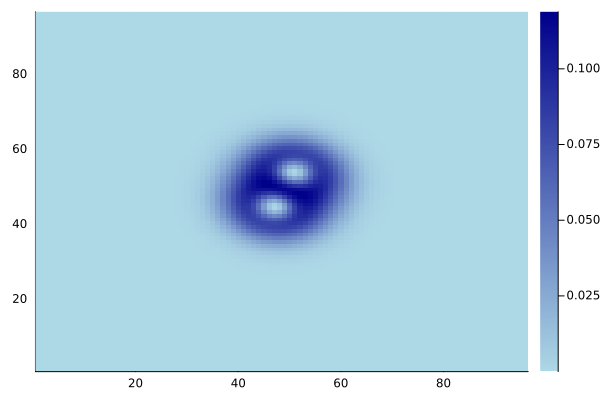

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)